In [3]:
import os

os.path.expanduser("~").replace("\\", "/")

'C:/Users/shanu'

In [ ]:
home_directory = os.path.expanduser("~")
print(home_directory)

In [5]:
import uuid
id = uuid.uuid4()
print(id)

2b4c8c79-ba94-4bc4-ab9f-acb617d90d88


In [1]:
from PIL import Image, ImageDraw

def create_arrow_icon(filename, direction="up"):
    img = Image.new("RGBA", (10, 10), (0, 0, 0, 0))
    draw = ImageDraw.Draw(img)
    if direction == "up":
        draw.polygon([(5, 0), (0, 10), (10, 10)], fill="white")
    else:
        draw.polygon([(5, 10), (0, 0), (10, 0)], fill="white")
    
    img.save(filename)

create_arrow_icon("up_arrow.png", "up")
create_arrow_icon("down_arrow.png", "down")


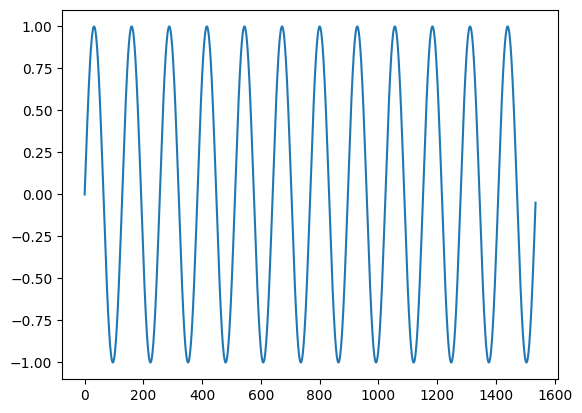

In [14]:
import numpy as np
import matplotlib.pyplot as  plt


sample_rate = 48000
chunk_size = 512

noise =  np.sin(2 * np.pi * 375 * np.arange(chunk_size) / sample_rate).astype(np.float32)
noise = np.concatenate([noise, noise, noise])
plt.plot(noise)

In [15]:
48000*3

144000

In [ ]:
import os
import json

# Directory containing the files
directory = "A:/NoiseShiled_noise_data"

# Create a dictionary to hold the file names
file_dict = {}

# Iterate over the files in the directory
for idx, filename in enumerate(os.listdir(directory), start=1):
    if filename.endswith(".wav"):  # Only include .wav files
        file_dict[idx] = filename

# Serialize the dictionary to a JSON file
with open("noise_file_data.json", "w") as json_file:
    json.dump(file_dict, json_file, indent=4)

print("JSON file created successfully.")

JSON file created successfully.


In [18]:
import hashlib, uuid

def generate_hash():
    return hashlib.sha256(uuid.uuid4().bytes).hexdigest()

print(generate_hash())

5ec82ee7b81b69d5a3183b5101d7d9c81c51a346705e8af7d2b878afae7ebffa


In [57]:
import uuid
print(type(uuid.uuid4().hex[:6]))

<class 'str'>


In [9]:
import numpy as np
import pyaudio
import threading
import time

def play_audio_stream(frequency=375, duration=5, sample_rate=48000, chunk_size=512):
    """
    Plays a sine wave and prints elapsed time every 0.5s.
    """
    p = pyaudio.PyAudio()

    stream = p.open(format=pyaudio.paFloat32,
                    channels=1,
                    rate=sample_rate,
                    output=True)

    # Time tracking variable
    start_time = time.time()
    running = True

    def print_time():
        """Print elapsed time every 0.5 seconds while playing."""
        while running:
            elapsed = time.time() - start_time
            print(f"Elapsed Time: {elapsed:.2f} sec")
            time.sleep(1/sample_rate)

    # Start time-printing thread

    # Generate and play sound
    t = np.arange(0, chunk_size) / sample_rate
    wave = np.sin(2 * np.pi * frequency * t).astype(np.float32)

    _running = False
    for _ in range(int(sample_rate / chunk_size * duration)):
        stream.write(wave.tobytes())
        if not _running:
            time_thread = threading.Thread(target=print_time, daemon=True)
            time_thread.start()
            _running = True

    # Stop printing time
    running = False
    stream.stop_stream()
    stream.close()
    p.terminate()

# Run function
play_audio_stream()


Elapsed Time: 0.03 sec
Elapsed Time: 0.04 sec
Elapsed Time: 0.04 sec
Elapsed Time: 0.04 sec
Elapsed Time: 0.04 sec
Elapsed Time: 0.04 sec
Elapsed Time: 0.04 sec
Elapsed Time: 0.04 sec
Elapsed Time: 0.04 sec
Elapsed Time: 0.04 sec
Elapsed Time: 0.04 sec
Elapsed Time: 0.04 sec
Elapsed Time: 0.04 sec
Elapsed Time: 0.04 sec
Elapsed Time: 0.04 sec
Elapsed Time: 0.04 sec
Elapsed Time: 0.05 sec
Elapsed Time: 0.05 sec
Elapsed Time: 0.05 sec
Elapsed Time: 0.05 sec
Elapsed Time: 0.05 sec
Elapsed Time: 0.05 sec
Elapsed Time: 0.05 sec
Elapsed Time: 0.05 sec
Elapsed Time: 0.05 sec
Elapsed Time: 0.05 sec
Elapsed Time: 0.05 sec
Elapsed Time: 0.05 sec
Elapsed Time: 0.05 sec
Elapsed Time: 0.05 sec
Elapsed Time: 0.05 sec
Elapsed Time: 0.05 sec
Elapsed Time: 0.05 sec
Elapsed Time: 0.05 sec
Elapsed Time: 0.06 sec
Elapsed Time: 0.06 sec
Elapsed Time: 0.06 sec
Elapsed Time: 0.06 sec
Elapsed Time: 0.06 sec
Elapsed Time: 0.06 sec
Elapsed Time: 0.06 sec
Elapsed Time: 0.06 sec
Elapsed Time: 0.06 sec
Elapsed Tim